In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
d = pd.read_csv(r"C:\Users\HP\Downloads\crime_crime (1).csv")

In [4]:
d.head(3)  

,Day Of Week,District,Incident Number,Location,Month,Occurred On Date,Offense Code,Offense Code Group,Offense Description,Personal Damage,Shooting,Street,Ucr Part,Year,Hour,Lat,Long,Reporting Area
0,Thursday,B2,NaN,"(0, 0)",4,4/7/2022 7:30:00 PM,3301,NaN,VERBAL DISPUTE,Don't Harm Life,0,THORNTON PLACE,NaN,2022,19,0.000000,0.000000,300.0
1,Wednesday,D14,225520077.0,"(42.34308127134165, -71.14172267328729)",2,2/2/2022 12:00:00 AM,3115,NaN,INVESTIGATE PERSON,Don't Harm Life,0,WASHINGTON ST,NaN,2022,0,42.343081,-71.141723,786.0
2,Saturday,B2,222934485.0,"(42.30803768051951, -71.08359213073199)",5,5/14/2022 8:50:00 PM,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,Don't Harm Life,0,BLUE HILL AVE,NaN,2022,20,42.308038,-71.083592,319.0


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63367 entries, 0 to 63366
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day Of Week          63367 non-null  object 
 1   District             63216 non-null  object 
 2   Incident Number      63366 non-null  float64
 3   Location             63367 non-null  object 
 4   Month                63367 non-null  int64  
 5   Occurred On Date     63367 non-null  object 
 6   Offense Code         63367 non-null  int64  
 7   Offense Code Group   0 non-null      float64
 8   Offense Description  63367 non-null  object 
 9   Personal Damage      63367 non-null  object 
 10  Shooting             63367 non-null  int64  
 11  Street               63366 non-null  object 
 12  Ucr Part             0 non-null      float64
 13  Year                 63367 non-null  int64  
 14  Hour                 63367 non-null  int64  
 15  Lat                  63367 non-null 

In [6]:
d['Damage_Count']=d['Personal Damage'].replace("Don't Harm Life",0).replace("Harm Life",1)

In [7]:
d['Day_Number']=d['Day Of Week'].replace("Monday",1).replace("Tuesday",2).replace("Wednesday",3).replace("Thursday",4).replace("Friday",5).replace("Saturday",6).replace("Sunday",7)

In [8]:
df = d[['Day_Number', 'Month', 'Shooting', 'Hour', 'Damage_Count']].copy()

In [9]:
df['Shooting'].value_counts()

0    62718
1      649
Name: Shooting, dtype: int64

In [10]:
df['Month'].value_counts()

7     6714
8     6598
6     6490
5     6469
9     6257
3     6134
10    6098
4     6097
1     5523
2     5416
11    1571
Name: Month, dtype: int64

In [11]:
df['Damage_Count'].value_counts()

0    39885
1    23482
Name: Damage_Count, dtype: int64

In [12]:
df['Day_Number'].value_counts()

5    9638
1    9289
4    9265
3    9217
6    9034
2    8956
7    7968
Name: Day_Number, dtype: int64

In [13]:
print('sum of duplicated values: {}'.format(df.duplicated().sum()))

sum of duplicated values: 59160


In [14]:
print('sum of null values: {}'.format(df.isnull().sum()))

sum of null values: Day_Number      0
Month           0
Shooting        0
Hour            0
Damage_Count    0
dtype: int64


In [15]:
df.describe()

,Day_Number,Month,Shooting,Hour,Damage_Count
count,63367.000000,63367.000000,63367.000000,63367.000000,63367.000000
mean,3.946565,5.756719,0.010242,12.720564,0.370571
std,1.970120,2.901081,0.100684,6.535037,0.482962
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000,9.000000,0.000000
50%,4.000000,6.000000,0.000000,13.000000,0.000000
75%,6.000000,8.000000,0.000000,18.000000,1.000000
max,7.000000,11.000000,1.000000,23.000000,1.000000


In [16]:
cor = df.corr()
cor

,Day_Number,Month,Shooting,Hour,Damage_Count
Day_Number,1.000000,-0.001496,0.021058,-0.022684,0.001953
Month,-0.001496,1.000000,0.006748,-0.009502,-0.016842
Shooting,0.021058,0.006748,1.000000,-0.001910,-0.012820
Hour,-0.022684,-0.009502,-0.001910,1.000000,0.016974
Damage_Count,0.001953,-0.016842,-0.012820,0.016974,1.000000


<AxesSubplot:>

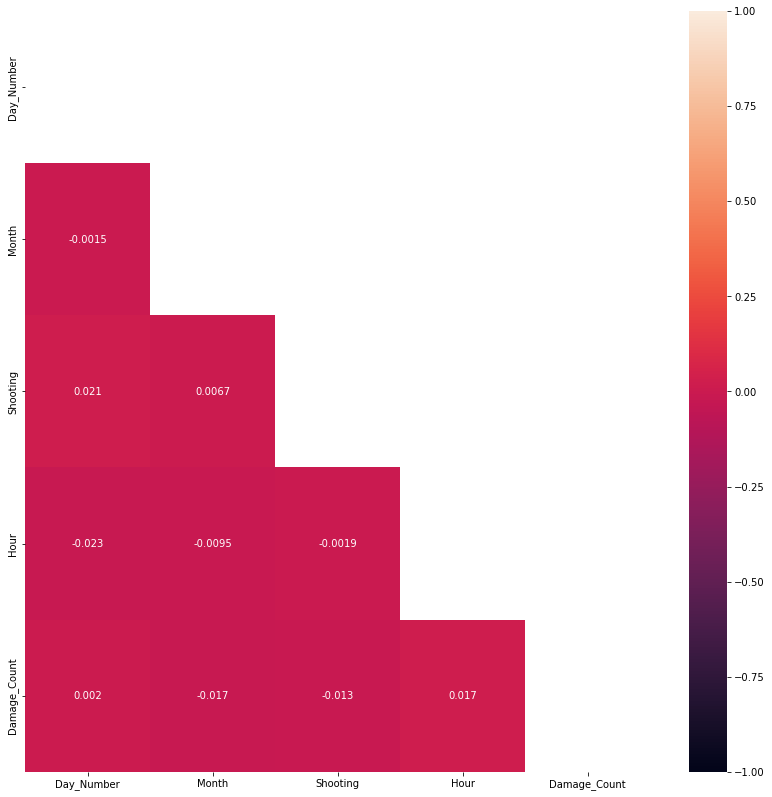

In [17]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=((14,14)))
sns.heatmap(cor,annot=True, mask=mask, vmin=-1, vmax=1)

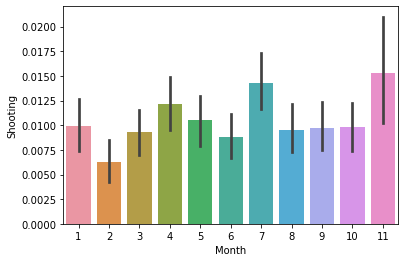

In [18]:
sns.barplot(x='Month',y='Shooting', data=df)
plt.show()

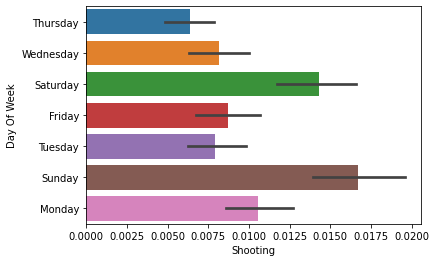

In [19]:
sns.barplot(x='Shooting',y='Day Of Week', data=d)
plt.show()

<AxesSubplot:xlabel='Day Of Week', ylabel='count'>

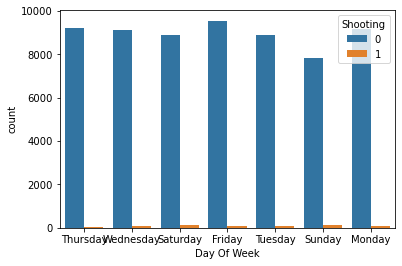

In [21]:
sns.countplot(data = d, x = 'Day Of Week',hue= 'Shooting')

<AxesSubplot:xlabel='Hour'>

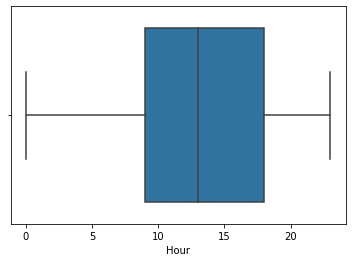

In [22]:
sns.boxplot(data = df,x = 'Hour')

<AxesSubplot:xlabel='Month'>

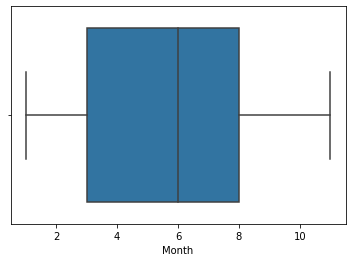

In [23]:
sns.boxplot(data = df,x = 'Month')

In [24]:
df.Day_Number = df.Day_Number.astype(int)

## Decision Tree

In [25]:
y=df['Damage_Count']
x=df.drop('Damage_Count',axis=1) 

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=123)

In [27]:
decisiontree_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=5)   
decisiontree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [28]:
pred_decisiontree = decisiontree_model.predict(x_test)

In [29]:
accuracy_dt = accuracy_score(y_test,pred_decisiontree)
accuracy_dt

0.6303497033202878

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_decisiontree))
print(classification_report(y_test, pred_decisiontree))

[[9986    0]
 [5856    0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      9986
           1       0.00      0.00      0.00      5856

    accuracy                           0.63     15842
   macro avg       0.32      0.50      0.39     15842
weighted avg       0.40      0.63      0.49     15842



[]

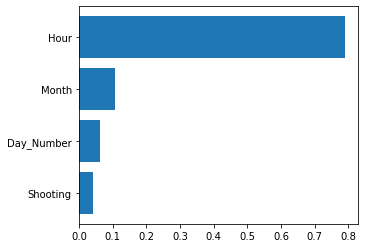

In [31]:
importances = decisiontree_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=[5, 4])
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set()

### Randon forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(random_state=42,max_depth=4)   
randomforest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [33]:
pred_randomforest = randomforest_model.predict(x_test)
pred_randomforest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
accuracy_rf=accuracy_score(y_test,pred_randomforest)
accuracy_rf

0.6303497033202878

In [35]:
print(confusion_matrix(y_test, pred_randomforest))
print(classification_report(y_test, pred_randomforest))

[[9986    0]
 [5856    0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      9986
           1       0.00      0.00      0.00      5856

    accuracy                           0.63     15842
   macro avg       0.32      0.50      0.39     15842
weighted avg       0.40      0.63      0.49     15842



[]

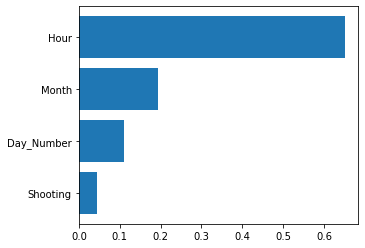

In [36]:
importances = randomforest_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=[5, 4])
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set()

## Gradient Boost

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gradientboost_model = GradientBoostingClassifier(random_state=40,max_depth=3)   
gradientboost_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=40)

In [39]:
pred_gradientboost = gradientboost_model.predict(x_test)
accuracy_score(y_test,pred_gradientboost)

0.6303497033202878

In [40]:
print(classification_report(y_test, pred_gradientboost))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      9986
           1       0.00      0.00      0.00      5856

    accuracy                           0.63     15842
   macro avg       0.32      0.50      0.39     15842
weighted avg       0.40      0.63      0.49     15842



[]

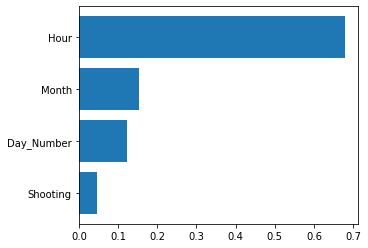

In [41]:
importances = gradientboost_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=[5, 4])
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])
ax.set()